In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
knn= KMeans(n_clusters = 3)
knn

KMeans(n_clusters=3)

In [12]:
import sys
print(sys.executable)


C:\Users\Archita Shrivastava\anaconda3\python.exe


In [13]:
!pip install --upgrade numpy scipy scikit-learn threadpoolctl



     ---------------------------------------- 12.9/12.9 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 41.3/41.3 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 308.4/308.4 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Archita Shrivastava\\anaconda3\\Lib\\site-packages\\~3mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [15]:
import sys
print(sys.executable)


C:\Users\Archita Shrivastava\anaconda3\python.exe


In [33]:
import numpy as np

# Extract your numeric data
X = df[['Age', 'Income($)']].to_numpy()

def kmeans_numpy(X, k=3, max_iter=100, random_state=0):
    rng = np.random.default_rng(random_state)
    n_samples, n_features = X.shape

    # --- 1. random initialization of centroids ---
    centroids = X[rng.choice(n_samples, size=k, replace=False)]

    for _ in range(max_iter):
        # --- 2. assign points to nearest centroid ---
        distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)

        # --- 3. recompute centroids ---
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # --- 4. stop if centroids don't move ---
        if np.allclose(centroids, new_centroids, rtol=1e-5, atol=1e-5):
            break
        centroids = new_centroids

    return labels, centroids

# Run clustering
labels, centroids = kmeans_numpy(X, k=3)
print(labels)
print("Centroids:\n", centroids)


[0 0 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0 0 1]
Centroids:
 [[3.40000000e+01 8.05000000e+04]
 [3.29090909e+01 5.61363636e+04]
 [3.82857143e+01 1.50000000e+05]]


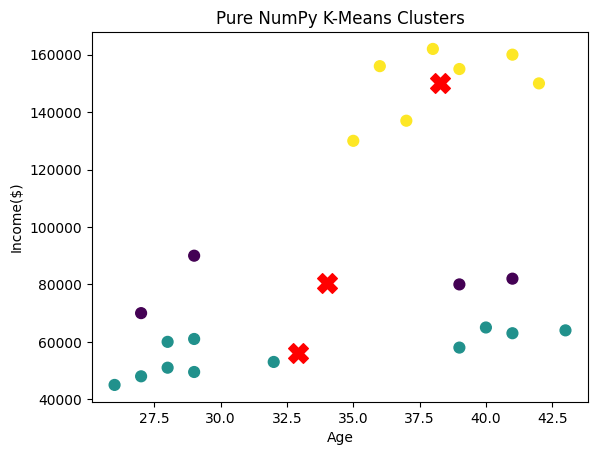

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Pure NumPy K-Means Clusters')
plt.show()
